# Implementation of RNN for Text Classifications


## STEP 1 : First, we will need the following dependencies to be imported.



In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences



The code imports the TensorFlow library (tf) along with its dataset module (tensorflow_datasets as tfds). Additionally, it imports NumPy (np) for numerical operations and Matplotlib (plt) for plotting. These libraries are commonly used for machine learning tasks and data visualization.



## STEP 2 : Load the dataset
### IMDB movies review dataset is the dataset for binary sentiment classification containing 25,000 highly polar movie reviews for training, and 25,000 for testing. This dataset can be acquired from this website or we can also use tensorflow_datasets library to acquire it.



In [11]:
# Load the IMDB dataset
vocab_size = 10000  # Vocabulary size
max_length = 250    # Max length of each review

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure uniform input size
train_data = pad_sequences(train_data, maxlen=max_length, padding='post')
test_data = pad_sequences(test_data, maxlen=max_length, padding='post')


## STEP 3 : Build and create the Model
### In this section, we will define the model we will use for sentiment analysis. The initial layer of this architecture is the text vectorization layer, responsible for encoding the input text into a sequence of token indices. These tokens are subsequently fed into the embedding layer, where each word is assigned a trainable vector. After enough training, these vectors tend to adjust themselves such that words with similar meanings have similar vectors. This data is then passed to LSTM layers which process these sequences and finally convert it to a single logit as the classification output.

## Text Vectorization
### We will first perform text vectorization and let the encoder map all the words in the training dataset to a token. We can also see in the example below how we can encode and decode the sample review into a vector of integers.



In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),  # Input layer
    tf.keras.layers.Embedding(vocab_size, 64),  # Embedding layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),  # First LSTM layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),  # Second LSTM layer
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Summary of the model
model.summary()

# Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 250, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ (None, 250, 128)            │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 751,489 (2.87 MB)

 Trainable params: 751,489 (2.87 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),  # Input layer
    tf.keras.layers.Embedding(vocab_size, 64),  # Embedding layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),  # First LSTM layer
    tf.keras.layers.Dropout(0.5),  # Dropout to prevent overfitting
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),  # Second LSTM layer
    tf.keras.layers.Dropout(0.5),  # Dropout layer
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with L2 regularization
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Summary of the model
model.summary()

# Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 250, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 250, 128)            │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 250, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 751,489 (2.87 MB)

 Trainable params: 751,489 (2.87 MB)

 Non-trainable params: 0 (0.00 B)

The code defines a TextVectorization layer (encoder) with a vocabulary size limit of 10,000 tokens and adapts it to the training dataset. It then extracts the vocabulary from the TextVectorization layer. The code encodes an example text using the TextVectorization layer (encoder(original_text).numpy()) and decodes it back to the original form using the vocabulary. This demonstrates how the TextVectorization layer can normalize, tokenize, and map strings to integers, facilitating text processing for machine learning models.



## STEP 4 : Training the model
### Now, we will train the model we defined in the previous step.



In [ ]:
batch_size = 32

# Convert data to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))

# Batch the datasets
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# Train the model
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset,
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 422s 528ms/step - accuracy: 0.6479 - loss: 0.6051 - val_accuracy: 0.6844 - val_loss: 0.6039
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 441s 527ms/step - accuracy: 0.7940 - loss: 0.4566 - val_accuracy: 0.8464 - val_loss: 0.3621
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 410s 525ms/step - accuracy: 0.8378 - loss: 0.3853 - val_accuracy: 0.8219 - val_loss: 0.4194
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 442s 525ms/step - accuracy: 0.8765 - loss: 0.3034 - val_accuracy: 0.8618 - val_loss: 0.3348
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 440s 523ms/step - accuracy: 0.9009 - loss: 0.2547 - val_accuracy: 0.8530 - val_loss: 0.3512
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 443s 525ms/step - accuracy: 0.9262 - loss: 0.1993 - val_accuracy: 0.8632 - val_loss: 0.3490
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 443s 527ms/step - accuracy: 0.9447 - loss: 0.1583 - val_accuracy: 0.8580 - val_loss: 0.3836
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 408s 522ms/step - accuracy: 0.9543 -

The code trains the defined model (model) using the training dataset (train_dataset) for 5 epochs. It also validates the model on the test dataset (test_dataset). The training progress and performance metrics are stored in the history variable for further analysis or visualization.



## STEP 5 : Plotting the results
### Plotting the training and validation accuracy and loss plots.

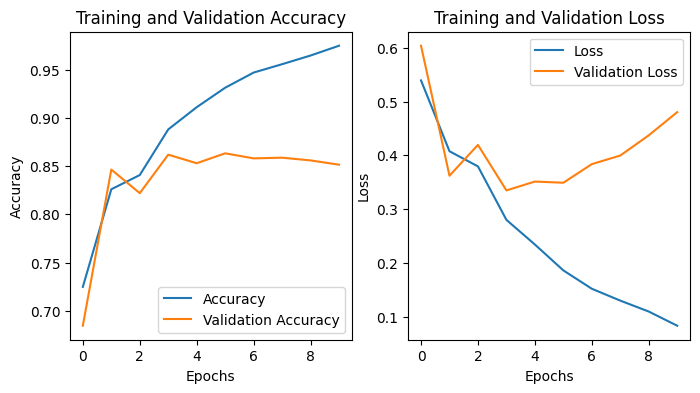

In [ ]:
# Plotting the accuracy and loss over time

# Training history
history_dict = history.history

# Seperating validation and training accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Seperating validation and training loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plotting
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])

plt.show()


The code visualizes the training and validation accuracy as well as the training and validation loss over epochs. It extracts accuracy and loss values from the training history (history_dict). The matplotlib library is then used to create a side-by-side subplot, where the left subplot displays accuracy trends, and the right subplot shows loss trends over epochs.



## STEP 7 : Testing the trained model
### Now, we will test the trained model with a random review and check its output.

In [ ]:
# Sample text to predict
sample_text = (
    '''The movie was so good and the animation are so dope.
    I would recommend my friends to watch it.'''
)

# Tokenize and pad the sample text
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts([sample_text])  # Fitting on the sample text to tokenize
sample_seq = tokenizer.texts_to_sequences([sample_text])
sample_padded = pad_sequences(sample_seq, maxlen=max_length, padding='post')

# Make prediction
predictions = model.predict(sample_padded)
print(*predictions[0])

# Print the label based on the prediction
if predictions[0] > 0:
    print('The review is positive')
else:
    print('The review is negative')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
0.52119416
The review is positive


In [ ]:
# Negative sample text
sample_text = (
    '''The movie was terrible. The plot was confusing and the acting was bad.
    I would not recommend it to anyone.'''
)

# Tokenize and pad the sample text
# Assuming you've already trained a tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts([sample_text])  # Fitting on the sample text to tokenize
sample_seq = tokenizer.texts_to_sequences([sample_text])
sample_padded = pad_sequences(sample_seq, maxlen=max_length, padding='post')

# Make prediction
predictions = model.predict(sample_padded)
print(*predictions[0])

# Print the label based on the prediction
if predictions[0] > 0.5:
    print('The review is positive')
else:
    print('The review is negative')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
0.116913244
The review is negative


#**Well done =)**